# Model Prediktif - Regresi

![](https://lh3.googleusercontent.com/proxy/WJdQU-ybhq8tAy_QxhSTZYOScXVAWQ4LQZORV1_8BADrdra89fZ_FhCEy5767FgNaHUmq625ouiHcWXzdQE3JtrLSwlNMxH_4Pf0EFfxSH9m90-dWUeCBdQXh4P1Ig)

Pada tutorial ini, kita akan belajar untuk membuat sebuah model prediktif menggunakan python. Adapun tahapan pembuatan model prediktif yang akan dibahas pada tutorial kali ini antara lain:

1. Pemahaman masalah
2. Import data
3. Analisis data eksploratif
4. Penyiapan data untuk machine learning
5. Training model
6. Parameter tuning model terpilih
7. Analisis Model Terbaik dan Error Prediksinya
8. Menyimpan model

In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install scipy

## 1 Pemahaman Masalah

Pada tutorial kali ini, kita akan membuat sebuah model prediktif untuk memprediksi memprediksi median harga rumah (*median housing price*) dari dataset **Calirfornia Housing Price** yang diambil dari repositori **Statlib**. Dataset ini didasarkan pada data sensus tahun 1990 di California. Model yang dibuat diharapkan akan membantu investor yang menjasi inverstor kita untuk menentukan apakah layak berinvestasi di suatu kawasan berdasarkan nilai harga median hunia yang ada di kawasan tersebut.

Dataset yayng digunakan memiliki sejumlah variabel yang diukur selama sensus, seperti: jumlah populasi, median pendapatan penduduk, median harga hunian, dan seterusnya untuk setiap blok kawasan yang ada di California. Blok kawasan merupakan unit pengelompokan terkecil yang digunakan oleh lembaga sensus saat itu (blok kawasan setidaknya memiliki populasi 600 sampai dengan 3000 orang). Untuk singkatnya kita sebut blok kawasan tersebut sebagai distrik.

## 2 Import Data

Dataset yang digunakan, akan diambil dari repository pada tautan [berikut]( https://github.com/ageron/handson-ml). Untuk membaca dataset tersebut, kita akan menggunakan fungsi `read_csv` dari modul `Pandas`.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

### 2.1 Cek Dataset

Hal pertama yang perlu kita cek adalah 5 observasi teratas dan terbawah.

In [ ]:
# cek 5 observasi teratas
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# cek 5 observasi terbawah
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Setiap baris pada data merepresentasikan sebuah distrik. Terdapat 10 kolom pada dataset tersebut, antara lain: `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, dan `ocean_proximity`.

Selanjutnya kita dapat menggunakan method `info` untuk memperoleh ringkasan singkat terkait dataset tersebut. Method tersebut akan menampilkan  ringkasan data, seperti: jumlah baris dan kolom, serta nama kolom dan jenis data masing-masing kolom.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Berdasarkan output yang dihasilkan, seluruh kolom mempunyai tipe data numerik, kecuali kolom `ocean_proximity` yang berupa kategori. Untuk melihat jumlah observasi pada masing-masing kelas kolom tersebut, jalankan perintah berikut:

In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Untuk melihat ringkasan data variabel numerik, jalankan perintah berikut:

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### 2.3 Data Splitting

Sebelum melangkah lebih jauh alangkah baiknya dataset yang telah kita miliki dipisah menjadi dataset `training` (untuk melatih model) dan dataset `test` (untuk mengevaluasi model). 

Terdapat dua buah jenis sampling pada tahapan *data splitting*, yaitu:

1. *random sampling* : sampling acak tanpa mempertimbangkan adanya strata dalam data
2. *startified random sampling* : sampling dengan memperhatikan strata dalam sebuah variabel.

Dalam proses pembentukan model kali ini, kita akan menggunakan metode kedua dengan tujuan untuk memperoleh distribusi yang seragam dari variabel target (`median_house_value`). Untuk melakukannya, terdapat beberapa tahapan yang perlu dilakukan, antara lain:

1. Binning variabel target
2. Membuat objek kelas untuk melakukan sampling
3. Aplikasi metode kelas pada masing-masing dataset

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
data["median_house_cat"] = np.ceil(data["median_house_value"] / 100000)
data["median_house_cat"].where(data["median_house_cat"] < 5, 5.0, inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.0


Lakukan *stratified sampling* berdasarkan kolom baru yang telah terbentuk.

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["median_house_cat"]):
  train = data.loc[train_index]
  test = data.loc[test_index]

Setelah proses sampling telah berhasil dilakukan, buang kolom `income_cat`.

In [ ]:
for set in (train, test):
  set.drop(["median_house_cat"], axis=1, inplace=True)

## 3 Analisis Data Eksploratif

Analsiis data eksploratif (EDA) ditujukan untuk mengenali data sebelum kita menentukan algoritma yang cocok digunakan untuk menganalisa data lebih lanjut. EDA merupakan sebuah proses iteratif yang secara garis besar menjawab beberapa pertanyaan umum, seperti:

1. Bagaimana distribusi data pada masing-masing variabel?
2. Apakah terdapat asosiasi atau hubungan antar variabel dalam data?

### 3.1 Visualisasi Varians

Varians dapat divisualisasikan menggunakan histogram (untuk data numerik) dan barplot (untuk data kategorikal).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

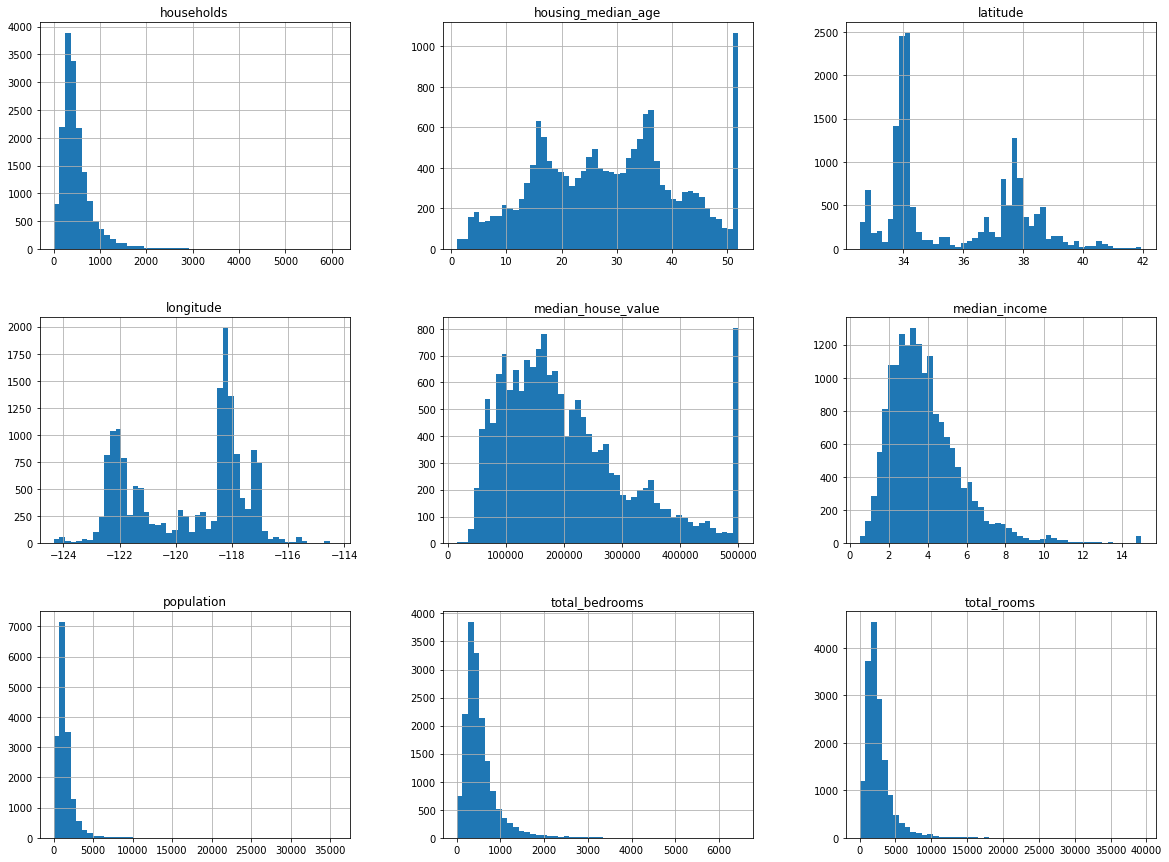

In [ ]:
train.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan hasil visualisasi terdapat beberapa poin yang dapat dijelaskan:

1. Distribusi seluruh variabel numerik tidak normal dan cenderung memiliki skewness positif.
2. Variabel `median_house_value` dan `housing_median_age` memiliki batas nilai. Sebagai contoh pada variabel `median_house_values`, hunian dengan nilai > 500.000 akan dibuat nilainya menjadi 500.000 untuk mencegah outlier. Hal ini akan menjadi masalah saat kita melakukan training model karena nilai yang dihasilkan model nantinya tidak dapat melakukan prediksi yang baik lebih dari nilai tersebut. Terdapat beberapa cara untuk mengatasi masalah tersebut, antara lain:

    *   Memcari data baru terkait nilai yang sebenarnya
    *   Membuang baris dengan nilai tersebut.

3. Sejumlah variabel memiliki skala pengukuran yang berbeda-beda. Ini menjadi masalah ketika kita ingin melatih sejumlah model parametrik dan model berbasiskan jarak antar observasi. Variabel dengan skala yang besar akan memberikan efek lebih besar pada output model dibanding variabel dengan skala yang lebih kecil.

Untuk keperluan pembelajaran, kita tidak akan membuang baris observasi pada tahapan ini. Data akan dibiarkan apa adanya untuk keperluan pembelajaran. Namun sejumlah data akan mengalami modifikasi pada tahapan *feature engineering* untuk mengoptimalkan proses pembentukan model.





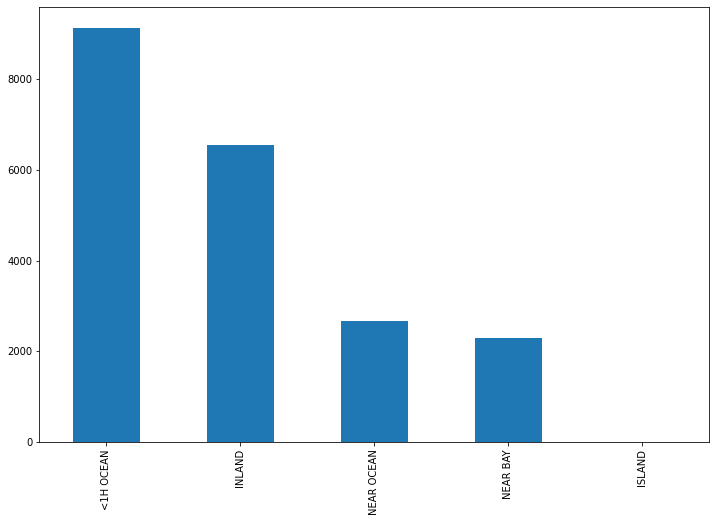

In [ ]:
data['ocean_proximity'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

### 3.2 Visualisasi Kovarians

Visualisasi kovarian dapat dilakukan menggunakan scatterplot (numerik vs numerik) atau menggunakan boxplot (numerik vs kategorikal).

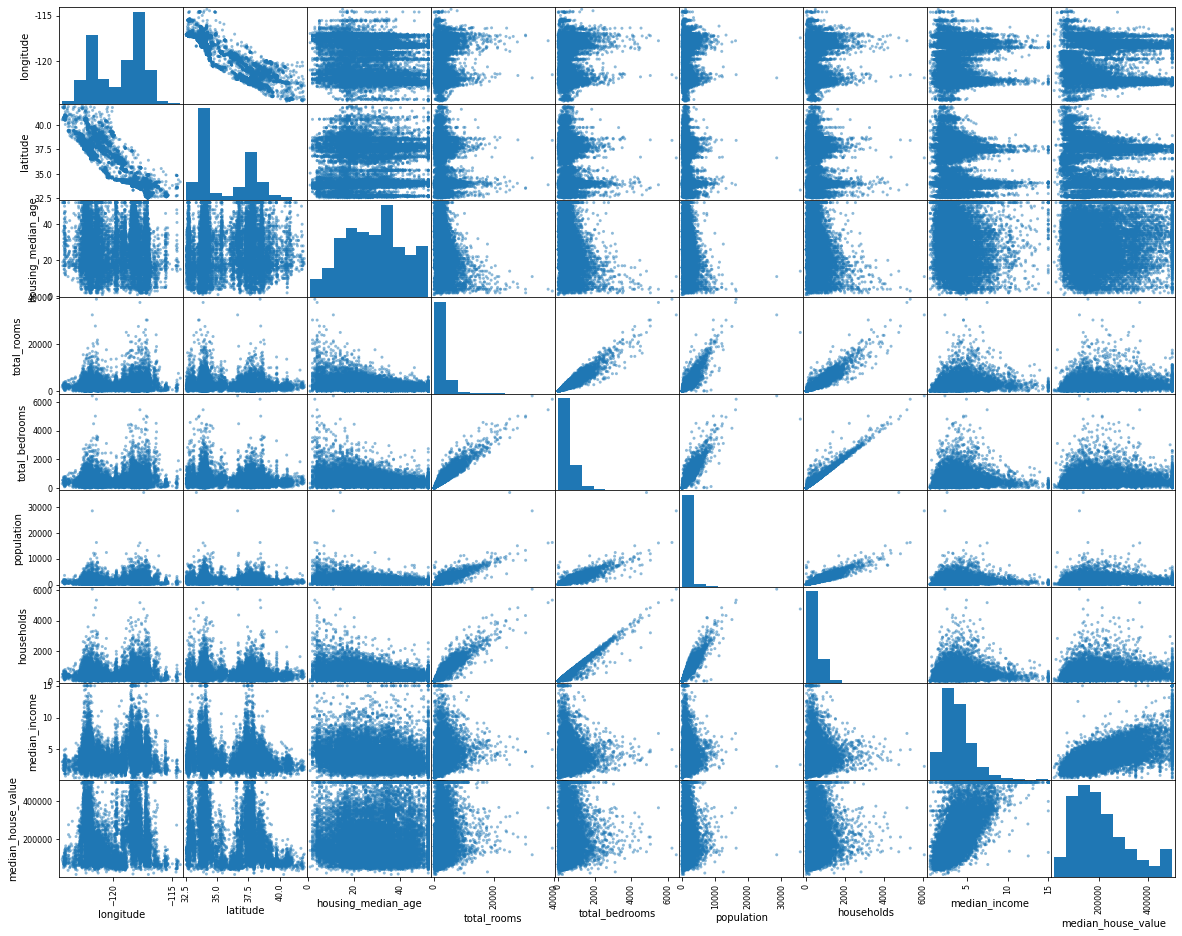

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train, figsize=(20, 16))

plt.show()

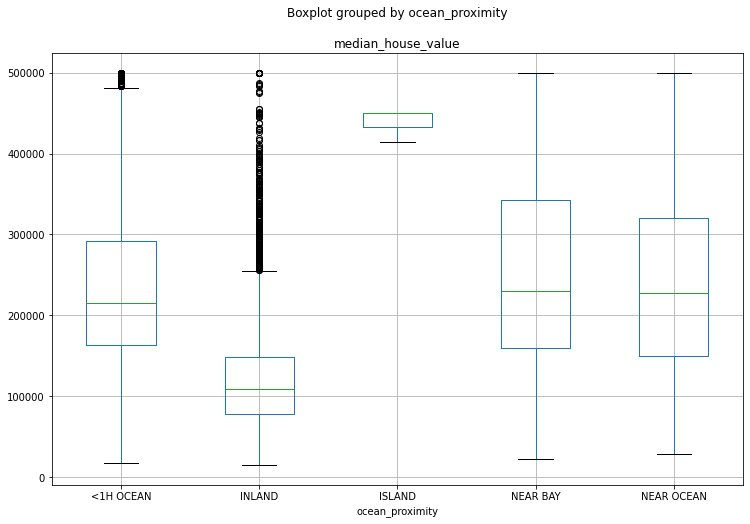

In [ ]:
train.boxplot(column='median_house_value', by = 'ocean_proximity', figsize=(12,8))
plt.show()

## 4 Penyiapan Data untuk Machine Learning

*Data preprocessing* dan *engineering* mengacu pada proses penambahan, penghapusan, atau transformasi data. Waktu yang diperlukan untuk memikirkan identifikasi kebutuhan *data engineering* dapat berlangsung cukup lama dan proprsinya akan menjadi yang terbesar dibandingkan analisa lainnya. Hal ini disebabkan karena kita perlu untuk memahami data apa yang akan kita oleh atau diinputkan ke dalam model.

Untuk menyederhanakan proses *feature engineerinh*, kita harus memikirkannya sebagai sebuah *blueprint* dibanding melakukan tiap tugasnya secara satu persatu. Hal ini membantu kita dalam dua hal:

1. Berpikir secara berurutan
2. Mengaplikasikannya secara tepat selama proses *resampling*

Memikirkan *feature engineering* sebagai sebuah *blueprint* memaksa kita untuk memikirkan urutan langkah-langkah *preprocessing* data. Meskipun setiap masalah mengharuskan kita untuk memikirkan efek *preprocessing* berurutan, ada beberapa saran umum yang harus kita pertimbangkan:

* Jika menggunakan log atau transformasi Box-Cox, jangan memusatkan data terlebih dahulu atau melakukan operasi apa pun yang dapat membuat data menjadi tidak positif. Atau, gunakan transformasi Yeo-Johnson sehingga kita tidak perlu khawatir tentang hal ini.
* *One-hot* atau *dummy encoding* biasanya menghasilkan data jarang (*sparse*) yang dapat digunakan oleh banyak algoritma secara efisien. Jika kita menstandarisasikan data tersebut, kita akan membuat data menjadi padat (*dense*) dan kita kehilangan efisiensi komputasi. Akibatnya, sering kali lebih disukai untuk standardisasi fitur numerik kita dan kemudian *one-hot/dummy endode*.
* Jika kila mengelompokkan kategori (*lumping*) yang jarang terjadi  secara bersamaan, lakukan sebelum *one-hot/dummy endode*.
* Meskipun kita dapat melakukan prosedur pengurangan dimensi pada fitur-fitur kategorikal, adalah umum untuk melakukannya terutama pada fitur numerik ketika melakukannya untuk tujuan feature engineering.

In [ ]:
train_copy = train.copy()
train_labels = train_copy["median_house_value"].copy()
train_copy = train_copy.drop("median_house_value", axis=1)
train_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1862,-124.15,41.81,17.0,3276.0,628.0,3546.0,585.0,2.2868,NEAR OCEAN
18832,-122.92,41.70,23.0,4017.0,792.0,1634.0,619.0,2.3571,INLAND
2488,-120.35,36.14,9.0,2671.0,647.0,1484.0,541.0,1.7075,INLAND
7637,-118.29,33.82,21.0,4383.0,901.0,2689.0,913.0,3.4375,<1H OCEAN
6941,-118.10,33.99,31.0,965.0,217.0,599.0,206.0,2.7202,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
18768,-122.24,40.51,23.0,2216.0,378.0,1006.0,338.0,4.5590,INLAND
5066,-118.30,33.99,44.0,1458.0,326.0,1159.0,283.0,1.1645,<1H OCEAN
4004,-118.61,34.15,32.0,4491.0,815.0,1696.0,749.0,4.9102,<1H OCEAN
19318,-123.02,38.46,52.0,2154.0,499.0,524.0,259.0,2.0556,NEAR OCEAN


Proses penulisan blueprint akan dibantu dengan *custom transformer* yang dibuat menggunakan perintah di bawah ini. Transformer ini menerima input berupa list kolom dari dataframe dan meneruskannya pada tahapan transformasi data selanjutnya. Transformer ini mengurangi proses penulisan nama kolom yang akan masuk ke dalam tahapan transformasi, sehingga kita hanya perlu fokus pada tahapan transformasi apa yang akan dilakukan pada data.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

Penulisan blueprint/pipeline transformasi pada proses *feature engineering* ditampilkan pada perintah berikut: 

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = list(train_copy.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_attribs)),
  ('imputer', KNNImputer()),
  ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_attribs)),
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('onehotencoder', OneHotEncoder(sparse = False))
])

full_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline)
])

Menerapkan blueprint pada data training.

In [ ]:
train_prepared = full_pipeline.fit_transform(train_copy)
train_prepared

array([[-2.2813647 ,  2.88761852, -0.92730526, ...,  0.        ,
         0.        ,  1.        ],
       [-1.66841867,  2.83618177, -0.45044749, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3877103 ,  0.23628785, -1.56311561, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.47938409, -0.69424972,  0.26483915, ...,  0.        ,
         0.        ,  0.        ],
       [-1.71825168,  1.32113568,  1.85436503, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.21691264, -1.26940611, -1.00678155, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
train_prepared.shape

(16512, 13)

Terkadang kita juga ingin memperoleh hasil transformasi dalam bentuk dataframe. Untuk melakukannya, jalankan perintah berikut:

In [ ]:
labels = num_attribs + train['ocean_proximity'].unique().tolist()

train_df = pd.DataFrame(train_prepared, columns=labels)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR OCEAN,INLAND,<1H OCEAN,NEAR BAY,ISLAND
0,-2.281365,2.887619,-0.927305,0.292908,0.213835,1.856885,0.224303,-0.830593,0.0,0.0,0.0,0.0,1.0
1,-1.668419,2.836182,-0.450447,0.633004,0.604195,0.181753,0.313571,-0.793651,0.0,1.0,0.0,0.0,0.0
2,-0.387710,0.236288,-1.563116,0.015231,0.259059,0.050336,0.108780,-1.135007,0.0,1.0,0.0,0.0,0.0
3,0.638850,-0.848560,-0.609400,0.800987,0.863642,1.106054,1.085476,-0.225916,1.0,0.0,0.0,0.0,0.0
4,0.733532,-0.769067,0.185363,-0.767771,-0.764446,-0.725026,-0.770771,-0.602847,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.329554,2.279730,-0.450447,-0.193600,-0.381227,-0.368448,-0.424202,0.363418,0.0,1.0,0.0,0.0,0.0
16508,0.633866,-0.769067,1.218555,-0.541499,-0.504999,-0.234402,-0.568606,-1.420347,1.0,0.0,0.0,0.0,0.0
16509,0.479384,-0.694250,0.264839,0.850556,0.658941,0.236072,0.654889,0.547969,1.0,0.0,0.0,0.0,0.0
16510,-1.718252,1.321136,1.854365,-0.222056,-0.093217,-0.790735,-0.631618,-0.952086,0.0,0.0,0.0,0.0,1.0


## 5 Training Model

Terdapat beberapa model yang akan kita coba training untuk melihat model potensial yang dapat digunakan untuk memprediksi `median_house_value`. Model-model regresi yang akan kita coba, antara lain:

1. regresi linier
2. k-nearest neigbors
3. decision trees
4. random forest
5. gradient boosting

Proses training terdiri dari 4 tahapan:
1. inisiasi objek model
2. fitting data pada model
3. validasi silang
4. perhitungan nilai metrik validasi

Metrik validasi yang akan digunakan dalam pemilihan model regresi adalah **RMSE**. Untuk menampilkan skor validasi, kita akan menggunakan fungsi berikut:

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

### 5.1 Regresi Linier

Regresi linier adalah pendekatan yang sangat sederhana pada model *supervised machine learning*. Secara khusus, regresi linier adalah alat yang berguna untuk memprediksi respons kuantitatif. Regresi linier telah ada sejak lama dan merupakan topik buku teks yang tak terhitung banyaknya. Meskipun mungkin tampak agak membosankan dibandingkan dengan beberapa pendekatan pembelajaran statistik yang lebih modern yang dijelaskan dalam tutorial selanjutnya, regresi linier masih merupakan metode pembelajaran statistik yang bermanfaat dan banyak digunakan. Selain itu, model ini berfungsi sebagai titik awal yang baik untuk pendekatan yang lebih baru: seperti yang akan kita lihat dalam tutorial selanjutnya, banyak pendekatan pembelajaran statistik mewah (*fancy*) dapat dilihat sebagai generalisasi atau perpanjangan dari regresi linier. Akibatnya, pentingnya memiliki pemahaman yang baik tentang regresi linier sebelum mempelajari metode pembelajaran yang lebih kompleks.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# membuat model
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

# validasi silang
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

# nilai rmse validasi silang
display_scores(lin_rmse_scores)

Scores: [68404.92579431 69866.27915879 71436.18778981 65379.13452533
 66358.46739652 69084.13304272 68764.1436358  69050.71000756
 70423.56408715 66563.45071659]
Mean: 68533.0996154591
Standard deviation: 1815.944675572591


Untuk mengecek residu dari prediksi model, jalankan perintah berikut:

In [ ]:
pred = lin_reg.predict(train_prepared)
res = pd.DataFrame({'actuals' : train_labels,
                   'predictions' : pred})
res['residuals'] = res['actuals']-res['predictions']
res

,actuals,predictions,residuals
1862,103100.0,44864.934606,58235.065394
18832,62000.0,64253.765925,-2253.765925
2488,60400.0,93119.128308,-32719.128308
7637,218800.0,204975.401665,13824.598335
6941,190300.0,173662.883465,16637.116535
...,...,...,...
18768,116800.0,142946.024654,-26146.024654
5066,98200.0,122690.710041,-24490.710041
4004,319100.0,293670.580756,25429.419244
19318,120000.0,217494.061001,-97494.061001


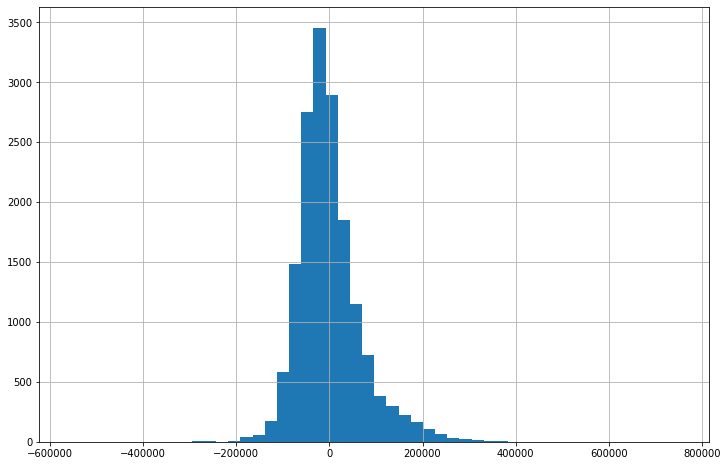

In [ ]:
# distribusi residual
res['residuals'].hist(bins = 50, figsize = (12, 8))

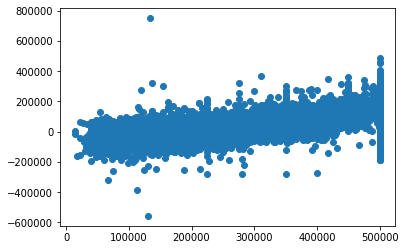

In [ ]:
# scatterplot
plt.scatter(res['actuals'], res['residuals'])
plt.show()

Kita dapat pula menghasilkan model regresi menggunakan modul statsmodel. Untuk melakukannya, jalankan perintah berikut:

In [ ]:
import statsmodels.api as sm

y = train_labels.reset_index()

lin_model=sm.OLS(y.median_house_value, train_df)
result=lin_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:        0.648      
Dependent Variable:      median_house_value    AIC:                   414544.7454
Date:                    2020-09-07 13:17      BIC:                   414644.9994
No. Observations:        16512                 Log-Likelihood:        -2.0726e+05
Df Model:                12                    F-statistic:           2529.      
Df Residuals:            16499                 Prob (F-statistic):    0.00       
R-squared:               0.648                 Scale:                 4.6820e+09 
---------------------------------------------------------------------------------
                      Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
longitude          -54485.9741  2261.3062 -24.0949 0.0000 -58918.3779 -50053.5703
latitude           -55016.3418  2376.3722

### 5.2 K-Nearest Neighbors

K-nearest Neighbors (KNN) adalah algoritma yang sangat sederhana di mana setiap pengamatan diprediksi berdasarkan "kesamaan" dengan pengamatan lainnya. Tidak seperti kebanyakan metode lainnya, KNN adalah algoritma berbasis memori dan tidak dapat diringkas oleh model bentuk tertutup. Ini berarti sampel pelatihan diperlukan saat run-time dan prediksi dibuat langsung dari hubungan sampel. Akibatnya, KNN juga dikenal sebagai *lazy learners* (Cunningham dan Delany 2007) dan dapat menjadi tidak efisien secara komputasi. Namun, KNN telah berhasil dalam sejumlah besar masalah bisnis (Jiang et al. (2012) dan Mccord dan Chuah (2011)) dan berguna untuk tujuan preprocessing juga.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# membuat model
nn_reg = KNeighborsRegressor()
nn_reg.fit(train_prepared, train_labels)

# validasi silang
nn_scores = cross_val_score(nn_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
nn_rmse_scores = np.sqrt(-nn_scores)

# nilai rmse validasi silang
display_scores(nn_rmse_scores)

Scores: [61020.48202751 62379.68479857 64012.46746108 57803.49029219
 58161.84977145 60426.68816943 58501.23136925 62956.37865034
 63037.12828335 61342.78916679]
Mean: 60964.21899899664
Standard deviation: 2095.381175270725


In [ ]:
pred = nn_reg.predict(train_prepared)
res = pd.DataFrame({'actuals' : train_labels,
                   'predictions' : pred})
res['residuals'] = res['actuals']-res['predictions']
res

,actuals,predictions,residuals
1862,103100.0,81120.0,21980.0
18832,62000.0,63180.0,-1180.0
2488,60400.0,99920.0,-39520.0
7637,218800.0,189640.0,29160.0
6941,190300.0,150960.0,39340.0
...,...,...,...
18768,116800.0,111440.0,5360.0
5066,98200.0,97480.0,720.0
4004,319100.0,345240.2,-26140.2
19318,120000.0,195340.0,-75340.0


<function matplotlib.pyplot.show>

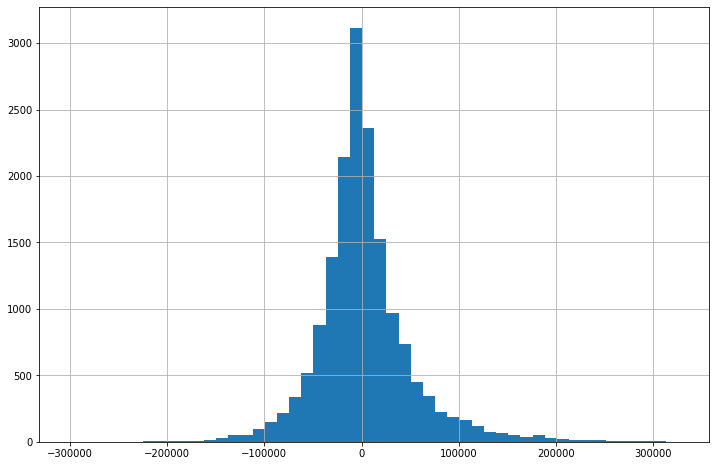

In [ ]:
# distribusi residual
res['residuals'].hist(bins = 50, figsize = (12, 8))
plt.show

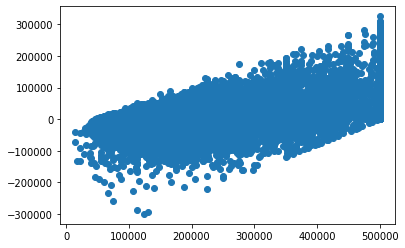

In [ ]:
# scatterplot
plt.scatter(res['actuals'], res['residuals'])
plt.show()

### 5.3 Ringkasan Hasil Training

Terdapat 5 buah model yang telah di training pada bahasan di atas dengan ringkasan sebagai berikut:

| Model     | Mean RMSE       |  Sdt. RMSE          |
|:----------|:----------------|:--------------------|
| Regresi Linier | 68533.0996103821 | 1815.9446844041981 |
| K-Nearest Neighbors | 60964.21899899664| 2095.381175270725|

Berdasarkan hasil yang diperoleh terdapat sebuah model yang cukup menjanjikan untuk dilakukan tuning lanjutan, yaitu: K-Nearest Neighbors.

 

## 6 Parameter Tuning Model Terpilih

Setelah model terpilih, model tersebut perlu dilakukan *tuning* untuk memperoleh parameter optimal pada model. Terdapat dua buah metode pencarian parameter optimal pada model, antara lain:

1. Grid Search
2. Randomized Search

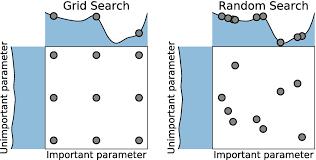



### 6.1 Grid Search

Opsi pertama yang dapat kita gunakan untuk melakukan pencarian parameter optimal adalah metode *Grid Search*. Pada metode ini, kita membuat kombinasi hyper parameter model secara manual.

In [ ]:
# KNN

from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_neighbors' : list(range(2,20,3))
}]

nn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(nn_reg, param_grid, cv=5,
  scoring='neg_mean_squared_error',
  return_train_score=True)

grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 5, 8, 11, 14, 17]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

66389.46897567059 {'n_neighbors': 2}
61207.27371517463 {'n_neighbors': 5}
60327.40196598264 {'n_neighbors': 8}
60007.134549172464 {'n_neighbors': 11}
59983.815030374084 {'n_neighbors': 14}
60221.730730734766 {'n_neighbors': 17}


### 6.2 Randomized Search

Metode grid search cukup baik apabila digunakan untuk menentukan model optimal dengan sedikit kombinasi hyperparameter. Namun jika hyperparameter sebuah model cukup banyak, disarankan untuk menggunakan metode randomized search. Metode ini akan mengevaluasi setiap kombinasi hyperparameter secara acak pada setiap iterasi.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"n_neighbors": np.arange(2, 30, 2),
              "metric": ["euclidean", "cityblock"]}

# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(nn_reg, param_distributions=param_dist, 
                                   cv =5,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True)

random_search.fit(train_prepared, train_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'metric': ['euclidean', 'cityblock'],
                                        'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=0)

In [ ]:
random_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='cityblock',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [ ]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

60428.92403755534 {'n_neighbors': 28, 'metric': 'cityblock'}
59030.611977455446 {'n_neighbors': 8, 'metric': 'cityblock'}
60660.75914256386 {'n_neighbors': 22, 'metric': 'euclidean'}
60317.501172860284 {'n_neighbors': 18, 'metric': 'euclidean'}
61196.71897227604 {'n_neighbors': 28, 'metric': 'euclidean'}
60164.18643980118 {'n_neighbors': 16, 'metric': 'euclidean'}
60391.54229879643 {'n_neighbors': 4, 'metric': 'cityblock'}
58984.080071257835 {'n_neighbors': 14, 'metric': 'cityblock'}
66389.46897567059 {'n_neighbors': 2, 'metric': 'euclidean'}
60068.667752617934 {'n_neighbors': 10, 'metric': 'euclidean'}


## 7 Analisis Model Terbaik dan Error Prediksinya

Analisis pertama yang dapat kita lakukan adalah melihat variabel paling berpengaruh terhadap performa prediksi model (feature importance).

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([0.10684897, 0.09736691, 0.0522226 , 0.03251477, 0.02804198,
       0.04036823, 0.02386367, 0.44416347, 0.01291919, 0.1532596 ,
       0.00052201, 0.00250462, 0.00540398])

In [ ]:
attributes = num_attribs + train['ocean_proximity'].unique().tolist()
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4441634668339872, 'median_income'),
 (0.15325960496722843, 'INLAND'),
 (0.10684896852311057, 'longitude'),
 (0.09736690941262889, 'latitude'),
 (0.05222259663111709, 'housing_median_age'),
 (0.040368229358573725, 'population'),
 (0.03251476924694539, 'total_rooms'),
 (0.02804198308465572, 'total_bedrooms'),
 (0.023863672222771862, 'households'),
 (0.012919194522145232, 'NEAR OCEAN'),
 (0.005403982558474034, 'ISLAND'),
 (0.0025046155981779976, 'NEAR BAY'),
 (0.0005220070401838903, '<1H OCEAN')]

Output yang diperoleh tersebut dapat digunakan sebagai informasi untuk meningkatkan performa model, seperti membuang sejumlah kolom yang kurang berpengaruh terhadap nilai prediksi. Selain itu, informasi tersebut dapat pula kita gunakan sebagai panduan dalam menentukan kebijakan bisnis yang kita miliki. Sebagai contoh: nilai median hunian di distrik California ditentukan oleh `median_income` dari penduduknya. Dalam hal ini menunjukkan bahwa semakin tinggi (berdasarkan visualisasi data sebelumnya) `median_income` suatu distrik, maka semakin tinggi nilai median huniannya.

Analisis terakhir yang dapat kita lakukan adalah menganilisa error model dengan menggunakan data test.

In [ ]:
final_model = grid_search.best_estimator_
X_test = test.drop("median_house_value", axis=1)
y_test = test["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

50160.42778447569

Kita dapat pula memperoleh rentang statistik nilai error yang dihasilkan model kita.

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
  loc=squared_errors.mean(),
  scale=stats.sem(squared_errors)))

array([47887.91560843, 52334.3536286 ])

## 8 Menyimpan Model dan Membuat Prediksi dengan Data Baru

Pipeline penyiapan data untuk model dan model yang telah dilatih selanjutnya dapat disimpan agar dapat digunakan kembali atau dideploy sebagai web service.

In [ ]:
import pickle

with open("knn-model.pkl", 'wb') as file:
    pickle.dump(final_model, file)
with open("pipeline.pkl", 'wb') as file:
    pickle.dump(full_pipeline, file)


Untuk memuat model dan pipeline yang telah disimpan, jalankan perintah berikut:

In [ ]:
# Load model and pipeline
with open("model.pkl", 'rb') as file:
    model = pickle.load(file)

with open("pipeline.pkl", 'rb') as file:
    pipeline = pickle.load(file)
    


Lakukan transformasi terhadap data yang akan diprediksi hasilnya.

In [ ]:
predictor = data.drop("median_house_value", axis=1)

data_prepared = pipeline.fit_transform(predictor)

Inputkan data yang telah ditransformasi ke dalam model.

In [ ]:
pred = model.predict(data_prepared)
pred

array([440386.8       , 388583.36666667, 391276.66666667, ...,
        85490.        ,  87476.66666667,  94410.        ])